# Modeling:



In [50]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from itertools import combinations
carolinaBlue = 'deepskyblue'  # because d00k sucks

In [8]:
# importing our data
folder = "CreatedData/"
df = pd.read_csv(folder + "RegSeason_all.csv")

In [7]:
# modeling libraries

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import accuracy_score

from datetime import datetime

# Split our data for Test/Train

In [4]:
# how much are we really working with here?

df.shape

(177238, 34)

In [5]:
df.columns

Index(['Season', 'TeamID', 'Score', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3',
       'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'isTourney',
       'Possessions', 'Shooting_Eff', 'EffectiveFGP', 'FGP3', 'Off_Rating',
       'Def_Rating', 'Off_RBP', 'Def_RBP', 'Tot_RBP', 'TO_Rate', 'FTP',
       'Ast_Ratio', 'Blk_Ratio', 'Stl_Ratio', 'Rtg_Margin', 'win'],
      dtype='object')

In [6]:
# Train_test_split


# we are dropping the basic statitistics which ran with an accuracy roughly around 70-75%.
# instead we'll be using the advance stats calculated.

y = df['win']
X = df.drop(columns = ['Season', 'TeamID', 'Score', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3',
                                'FTM', 'FTA', 'FTP','OR', 'DR', 'Ast', 'win', 'Rtg_Margin'])

# making sure we don't have any of those NaNs still.  
# also of note.  If you are using Free Throw percentages as a key feature, there are 15
# games where a team has attempted zero Free Throws.

X.isna().sum()

TO              0
Stl             0
Blk             0
PF              0
isTourney       0
Possessions     0
Shooting_Eff    0
EffectiveFGP    0
FGP3            0
Off_Rating      0
Def_Rating      0
Off_RBP         0
Def_RBP         0
Tot_RBP         0
TO_Rate         0
Ast_Ratio       0
Blk_Ratio       0
Stl_Ratio       0
dtype: int64

In [7]:
X.columns

Index(['TO', 'Stl', 'Blk', 'PF', 'isTourney', 'Possessions', 'Shooting_Eff',
       'EffectiveFGP', 'FGP3', 'Off_Rating', 'Def_Rating', 'Off_RBP',
       'Def_RBP', 'Tot_RBP', 'TO_Rate', 'Ast_Ratio', 'Blk_Ratio', 'Stl_Ratio'],
      dtype='object')

In [8]:
# train/test/split, using random_state of 23 so we can repeat our results.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

# Functions:

In [9]:
# According to basic Decision Tree, these are the important features.

def plot_feature_importances(model):

    ''' plots a horizontal bar chart using the feature_imporances_ /
    object of the model being run.  Makes it easy for us to visualize /
    our most importat features. '''    

    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.title ('Ranking our Features')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


# Decision Tree

Our first model up is the decision tree.

In [10]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree_clf.fit(X_train, y_train)
tree_clf.feature_importances_

dt_cv_score = cross_val_score(tree_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

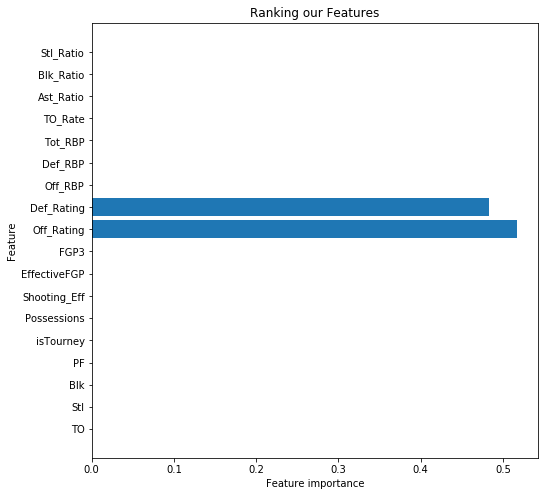

In [11]:
plot_feature_importances(tree_clf)

In [12]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[21359   639]
 [  706 21606]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21998
           1       0.97      0.97      0.97     22312

    accuracy                           0.97     44310
   macro avg       0.97      0.97      0.97     44310
weighted avg       0.97      0.97      0.97     44310



In [13]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 96.96%


In [14]:
def DTC():
    
    '''
    runs a DecisionTreeClassifier on the test data
    returns accuracy and predictions given the classifier
    
    '''
    tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
    tree_clf.fit(X_train, y_train)
    tree_clf.feature_importances_

    dt_cv_score = cross_val_score(tree_clf, X_train, y_train, cv=3)
    mean_dt_cv_score = np.mean(dt_cv_score)
    
    pred = tree_clf.predict(X_test)
    
    return(round(accuracy_score(y_test, pred) * 100, 4))


# Bagged Trees

In [15]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [16]:
# Test set predictions
treepred = bagged_tree.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, treepred))
print(classification_report(y_test, treepred))

[[21468   530]
 [  597 21715]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     21998
           1       0.98      0.97      0.97     22312

    accuracy                           0.97     44310
   macro avg       0.97      0.97      0.97     44310
weighted avg       0.97      0.97      0.97     44310



In [17]:
print("Testing Accuracy for Bagged Tree: {:.4}%".format(accuracy_score(y_test, treepred) * 100))

Testing Accuracy for Bagged Tree: 97.46%


In [18]:
def bt():
    bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                     n_estimators=20)
    bagged_tree.fit(X_train, y_train)
    treepred = bagged_tree.predict(X_test)
    return(round(accuracy_score(y_test, treepred) * 100, 4))

# Random Forest

In [19]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# we actually did worse with a random forest.

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

# Test set predictions
fpred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, fpred))
print(classification_report(y_test, fpred))

0.955291586422725
0.9552471225457008
[[20985  1013]
 [  970 21342]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     21998
           1       0.95      0.96      0.96     22312

    accuracy                           0.96     44310
   macro avg       0.96      0.96      0.96     44310
weighted avg       0.96      0.96      0.96     44310



In [21]:
# another forest, and we'll take a look at invidual trees

forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf_tree_2 = forest_2.estimators_[1]

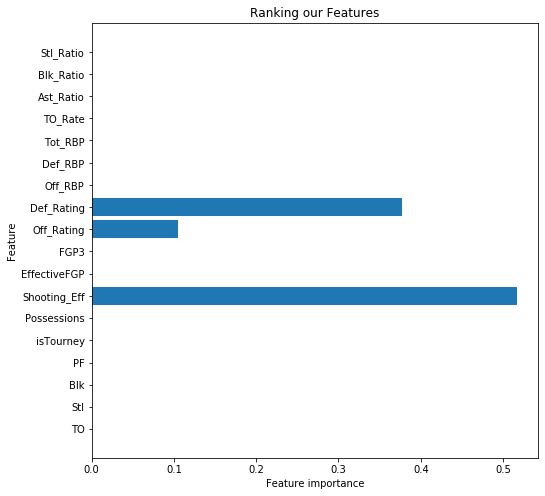

In [23]:
plot_feature_importances(rf_tree_2)

In [24]:
def rf():
    forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
    forest.fit(X_train, y_train)
    
    forest_pred = forest.predict(X_test)
    
    return(round(accuracy_score(y_test, forest_pred) * 100, 4))

# GridSearch

In [25]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [26]:
dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True, verbose = 1, n_jobs=-1)

dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                     

In [27]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 94.66%
Mean Test Score: 97.46%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [28]:
# Test set predictions
gspred = dt_grid_search.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, gspred))
print(classification_report(y_test, gspred))

[[21460   538]
 [  588 21724]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     21998
           1       0.98      0.97      0.97     22312

    accuracy                           0.97     44310
   macro avg       0.97      0.97      0.97     44310
weighted avg       0.97      0.97      0.97     44310



In [29]:
def gs_tree():
    dt_param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6]
        }
    dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True, verbose = 1, n_jobs=-1)

    dt_grid_search.fit(X_train, y_train)
    print("Best Parameter Combination Found During Grid Search:")
    print(dt_grid_search.best_params_)
    gstree_pred = dt_grid_search.predict(X_test)
    return(round(accuracy_score(y_test, gstree_pred) * 100, 4))

In [30]:
# Gridsearch with random forest classifier

In [31]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [32]:
rf_clf = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 5)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv = 3))

In [33]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, verbose=3, n_jobs=-1, return_train_score=True)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 24.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=10,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=5, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_j

In [34]:
# Mean training and testing score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])
rf_gs_testing_score = rf_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {rf_gs_training_score :.2%}")
print(f"Mean Test Score: {rf_gs_testing_score :.2%}")
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Mean Training Score: 96.44%
Mean Test Score: 97.81%
Training Accuracy: 97.77%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
def gs_forest():
    
    rf_param_grid = {
        'n_estimators': [10, 30, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 6, 10],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [3, 6]
    }
    rf_clf = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 5)
    rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, verbose=3, n_jobs=-1, return_train_score=True)
    rf_grid_search.fit(X_train, y_train)
    print(f"Optimal Parameters: {rf_grid_search.best_params_}")
    return (round(rf_grid_search.best_score_, 4)*100)

# Optimal Model
Running our Optimal Parameters gives us an accuracy score of 97.75%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 
'min_samples_leaf': 3,'min_samples_split': 5, 'n_estimators': 30}

In [36]:
optimal_forest = RandomForestClassifier(criterion = 'entropy', 
                                max_depth = 10, 
                                min_samples_leaf = 3, 
                                min_samples_split = 5, 
                                n_estimators = 30)
optimal_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

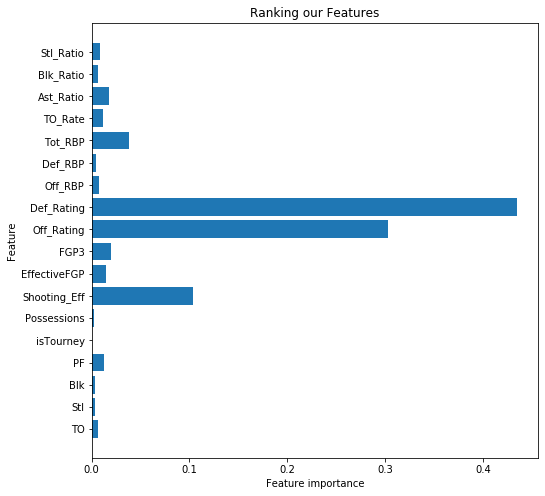

In [37]:
# plot of our feature importances
plot_feature_importances(optimal_forest)

In [38]:
# optimal_forest.predict_proba(X_test)

In [39]:
# Test set predictions
optimal_predictions = optimal_forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, optimal_predictions))
print(classification_report(y_test, optimal_predictions))

[[21447   551]
 [  564 21748]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21998
           1       0.98      0.97      0.98     22312

    accuracy                           0.97     44310
   macro avg       0.97      0.97      0.97     44310
weighted avg       0.97      0.97      0.97     44310



In [40]:
optimal_forest.feature_importances_

array([6.68927175e-03, 3.67280849e-03, 3.90166089e-03, 1.28102447e-02,
       2.20948331e-05, 2.32361181e-03, 1.03558171e-01, 1.51972569e-02,
       1.98526926e-02, 3.02398840e-01, 4.34409879e-01, 7.62907790e-03,
       4.29247169e-03, 3.79232469e-02, 1.17047253e-02, 1.78004618e-02,
       6.94073927e-03, 8.87274445e-03])

In [180]:
import math
RegSeason_advanced = pd.read_csv('CreatedData/RegSeason_all.csv')
RegSeason_Means = RegSeason_advanced.groupby(['TeamID','Season']).mean().reset_index()

df_Seeds = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneySeeds.csv")
results = pd.read_csv("2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv")

In [12]:
def getKaggleOutput(year):
    '''
    For given season, return predictions of all team combinations in the kaggle format:
    list of [yyyy_winningTeam_losingTeam, confidence%]
    
    '''    
    # get our list of teams entered in this year's tournament

    teams_dancing = df_Seeds[df_Seeds['Season']==year]['TeamID'].values

    
    # creating our output list
    output = []
    comb = combinations(teams_dancing, 2)
    for i in list(comb):
        output.append(ContrastTeams(i[0], i[1], year))
    return (output)
    

In [75]:
duke = RegSeason_advanced[(RegSeason_advanced['Season']==2019) & (RegSeason_advanced['TeamID']==1181)]
carolina = RegSeason_advanced[(RegSeason_advanced['Season']==2019) & (RegSeason_advanced['TeamID']==1314)]

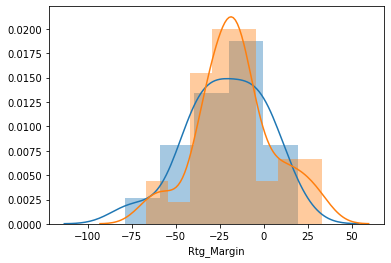

In [145]:
#probability of upset = 1 - 1/2 erf(c-mu1/(std1)* sqrt(2)) + 1/2 erf(c-mu2/(std2)*sqrt(2)) where
var = "Rtg_Margin"
mu1 = duke[var].mean()
mu2 = carolina[var].mean()
std1 = duke[var].std()
std2 = carolina[var].std()
sns.distplot(duke[var])
sns.distplot(carolina[var])

In [154]:
def calc_underdog_win(m1, m2, s1, s2):
    c_numerator = ( (m2 * s1**2) - \
                s2*( m1*s2 + s1 * \
                math.sqrt( (m1 - m2)**2 + \
                2*(s1**2 - s2**2)*math.log(s1/s2) )) \
                )
    c_denominator = s1**2 - s2**2
    c = c_numerator/c_denominator
    p = 1 - 0.5*erf( (c-mu1)/ (math.sqrt(2)*s1) ) + 0.5*erf( (c-m2)/(math.sqrt(2)*s2) )
    return (p)

In [155]:
from scipy.special import erf
from scipy import stats



In [156]:
calc_underdog_win(mu1,mu2,std1,std2)

0.9101093925857333

The Gauntlet

In [157]:
tourney_team = RegSeason_Means[(RegSeason_Means['Season']==2019)&(RegSeason_Means['win']>=.65) ]
tourney_mu = (tourney_team["Rtg_Margin"].mean())
tourney_std = (tourney_team["Rtg_Margin"].std())

In [167]:
# Function Contrast Teams

def ContrastTeams(TeamID1, TeamID2, year):
    '''
    Take in 2 teams for a specific season.  
    Return the predicted winning team and our confidence in the format of:
    ["Year_winningTeamID_losingTeamID", confidence %]
    '''
    
    #instantiate our variables
    
    score1 = 0
    score2 = 0
    confidence = 0
    var = "Rtg_Margin"
    
    team1 = RegSeason_advanced[(RegSeason_advanced['Season']==year) & (RegSeason_advanced['TeamID']==TeamID1)]
    team2 = RegSeason_advanced[(RegSeason_advanced['Season']==year) & (RegSeason_advanced['TeamID']==TeamID2)]
    mu1 = team1[var].mean()
    mu2 = team2[var].mean()
    std1 = team1[var].std()
    std2 = team2[var].std()
    # Confidence Scoring comes here.
    
    score1 = team1["Rtg_Margin"].mean()*-1
    score2 = team2['Rtg_Margin'].mean()*-1
    
    ''' score1 = team1["Rtg_Margin"].values[0]*-1
    score2 = team2['Rtg_Margin'].values[0]*-1'''
    # baseline constant.  no rhyme or reason for now
    k = 0
    
    if (score1 > score2):

        confidence = calc_underdog_win(mu1,mu2,std1,std2)
        return ( [(str(year) + "_" + str(TeamID1) + "_" + str(TeamID2)), scale_confidence(confidence)] )
    
    else:
        confidence = calc_underdog_win(mu2,mu1,std2,std1)
        return ( [(str(year) + "_" + str(TeamID2) + "_" + str(TeamID1)), scale_confidence(confidence)] )
    

    

In [185]:
def scale_confidence(c):
    return c-.25

In [186]:
testset = getKaggleOutput(2017)

In [187]:
testset

[['2017_1437_1181', 0.6468752330964356],
 ['2017_1437_1124', 0.5763639557966157],
 ['2017_1437_1196', 0.6800657416366984],
 ['2017_1437_1438', 0.602764928843184],
 ['2017_1374_1437', 0.7438487707427885],
 ['2017_1437_1376', 0.5459585765842407],
 ['2017_1437_1458', 0.6176675153809272],
 ['2017_1437_1439', 0.4556378134211808],
 ['2017_1437_1266', 0.5302230523575898],
 ['2017_1437_1344', 0.4447545492206664],
 ['2017_1437_1425', 0.5142007691324711],
 ['2017_1437_1423', 0.57510071483657],
 ['2017_1437_1190', 0.5774889406192574],
 ['2017_1437_1308', 0.6008475875440242],
 ['2017_1437_1407', 0.39590897318941776],
 ['2017_1437_1291', 0.31955246451082064],
 ['2017_1437_1309', 0.4105870773655701],
 ['2017_1211_1437', 0.7852703077523124],
 ['2017_1437_1112', 0.6656114986788073],
 ['2017_1437_1199', 0.5908839673823754],
 ['2017_1437_1452', 0.6968416745844531],
 ['2017_1437_1323', 0.587814869774106],
 ['2017_1437_1268', 0.4443122606620573],
 ['2017_1388_1437', 0.6958974808254605],
 ['2017_1437_1321'

In [ ]:
def Gauntlet():
    
    print ('Accuracy Scores: ')
    # print ('Decision Tree Classifier: ', DTC())
    # print ('Bagged Tree: ', bt())
    # print ('Random Forest: ', rf())
    # print ('Grid Search with Tree Classifier: ', gs_tree())
    # print ('Grid Search with Random Forest: ', gs_forest())


In [175]:
# create function to parse file format into prediction labels.

def translate_prediction(single_prediction):
    '''
        Function takes in a single prediction line and returns a list with 2 values 
        with format [boolean prediction_is_correct, confidence]
        
    '''
    s, p = single_prediction
    year, team1, team2 = map(int, s.split('_'))
    temp_df = results.loc[(results['Season'] == year) & 
                      (((results['WTeamID'] == team1) & (results['LTeamID'] == team2)) |
                      ((results['WTeamID'] == team2) & (results['LTeamID'] == team1)))
                        ]
    try:
        if temp_df['WTeamID'].values[0] == team1:
            return ([1, p])
        else:
            return ([0, p])                

    except:
        #game doesn't happen
        pass

In [188]:
predictions = []

for i in testset:
    x = translate_prediction(i)
    if x is not None:
        predictions.append(x)

In [191]:
df_win = pd.DataFrame(predictions,  columns=['correct', 'confidence'])
df_win

,correct,confidence
0,0,0.617668
1,1,0.319552
2,0,0.561888
3,1,0.414076
4,0,0.582335
5,1,0.533466
6,0,0.584245
7,1,0.625828
8,0,0.556500
9,1,0.641537


In [190]:
from sklearn.metrics import log_loss
log_loss(df_win['correct'], df_win['confidence'], eps = 1e-15)

0.7456681318329116